In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurlisawidyaningsih","key":"15449c4c6ca89c6b9671600c5a0b4d6e"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!kaggle datasets download -d nanditapore/healthcare-diabetes

Dataset URL: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes
License(s): Apache 2.0
  0% 0.00/26.7k [00:00<?, ?B/s]
100% 26.7k/26.7k [00:00<00:00, 37.7MB/s]


In [7]:
!unzip healthcare-diabetes.zip -d healthcare-diabetes
!ls healthcare-diabetes

Archive:  healthcare-diabetes.zip
  inflating: healthcare-diabetes/Healthcare-Diabetes.csv  
Healthcare-Diabetes.csv


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [9]:
df = pd.read_csv("/content/healthcare-diabetes/Healthcare-Diabetes.csv")

In [10]:
df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [12]:
df.drop(columns=['Id'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


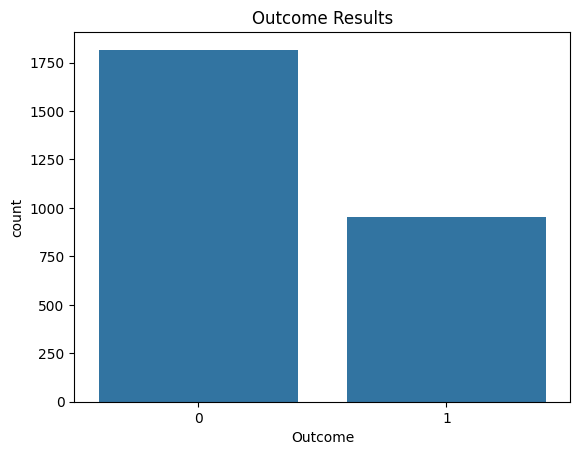

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['Outcome'])
plt.title('Outcome Results');

In [15]:
X = df.drop("Outcome",axis=1)
Y = pd.get_dummies(df['Outcome'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [17]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (2076, 8)
Shape of Y_train is: (2076, 2)

Shape of X_test is: (692, 8)
Shape of Y_test is: (692, 2)


In [18]:
input_dim = X.shape[1]

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [20]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
result = model.fit(X_train, Y_train, epochs = 25, batch_size = 10)

Epoch 1/25
208/208 [==============================] - 1s 3ms/step - loss: 0.5645 - accuracy: 0.7115
Epoch 2/25
208/208 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7086
Epoch 3/25
208/208 [==============================] - 1s 3ms/step - loss: 0.5569 - accuracy: 0.7100
Epoch 4/25
208/208 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.7081
Epoch 5/25
208/208 [==============================] - 1s 3ms/step - loss: 0.5568 - accuracy: 0.7153
Epoch 6/25
208/208 [==============================] - 1s 3ms/step - loss: 0.5521 - accuracy: 0.7177
Epoch 7/25
208/208 [==============================] - 1s 3ms/step - loss: 0.5513 - accuracy: 0.7177
Epoch 8/25
208/208 [==============================] - 1s 3ms/step - loss: 0.5513 - accuracy: 0.7254
Epoch 9/25
208/208 [==============================] - 1s 3ms/step - loss: 0.5511 - accuracy: 0.7129
Epoch 10/25
208/208 [==============================] - 1s 3ms/step - loss: 0.5480 - accuracy: 0.7197

In [25]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

22/22 [==============================] - 0s 1ms/step


In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7398843930635838


In [27]:
model.save('./healthcarediabet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
model = tf.keras.models.load_model('./healthcarediabet.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./healthcarediabet.tflite", "wb").write(tflite_model)

2580